In [1]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
import numpy as np
import random

# Configuration Model Red Práctica 1

Distribución de grado de la Red Nº  39


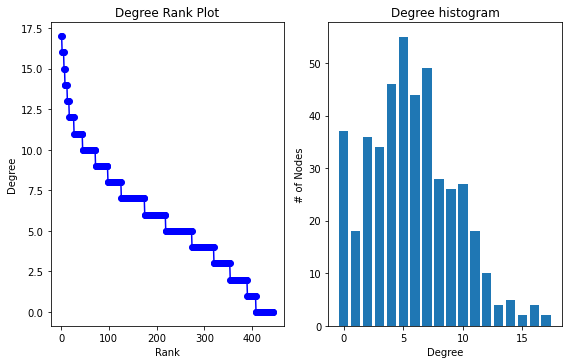

RED 1 
 ---------------------------------------------------------------- 

Número de nodos: 445.0
Número de aristas: 2.873583530991146e+16
Camino mínimo medio: 407.9
Grado medio: 5.72
Radio medio de la red 4.6
Diámetro medio de la red 7.2
Media del coeficiente de clustering 0.01722736860701169
Coeficiente de clustering global 0.01921398742161197


In [3]:
# Red conforme a una secuencia de grados
#
# Podemos generar una red con una secuencia de grados dada
# Dicha secuencia puede seguir una determinada distribución, 
# por ejemplo, una uniforme, una normal, una ley de potencias, etc
# Sin embargo, la red resultante puede tener multi-enlaces y 
# auto-enlaces. La presencia de estos decrece si el número de nodos
# es alto con respecto al grado medio de la distribución.



N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=0

#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
mean = dt = vmax = vmin = []; 
# Generamos una secuencia de grados aleatoria que sigue
# una distribución normal de media 15 y desviación típica 2
# Generamos 40 grados (nuestra red tendrá 40 nodos)
valores_aleatorios = np.random.normal(6, 4, 445) 
# Truncamos los valores para tener números enteros
grados_aleatorios = valores_aleatorios.astype(int)
#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
for x in range(50):
    #La suma de todos los grados de los nodos de la red debe ser par
        while sum(grados_aleatorios) % 2 != 0:
            valores_aleatorios = np.random.normal(6, 4, 445) 
            
            grados_aleatorios = valores_aleatorios.astype(int)
        
        grafo_redp1 = nx.configuration_model(grados_aleatorios)

        # Potencialmente la red puede tener múltiples enlaces (entre 
        # un mismo par de nodos). Para eliminarlos se hace lo siguiente
        grafo_redp1 = nx.Graph(grafo_redp1)

        # IDEM con los auto-enlaces (self-loops)
        grafo_redp1.remove_edges_from(nx.selfloop_edges(grafo_redp1))
        red1 = grafo_redp1
        grados = [val for (node, val) in red1.degree()]
        mean.append(np.mean(grados))
        dt.append(np.std(grados))
        vmax.append(np.amax(grados))
        vmin.append(np.amin(grados))

        N1 = N1 + red1.number_of_nodes()
        L1 += L1 + red1.number_of_edges()
        gradomedio1 += 2 * red1.number_of_edges()/ red1.number_of_nodes()
        clustering1 += nx.average_clustering(red1)
        clusterglobal1 += nx.transitivity(red1)
        #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
        conectado = nx.connected_components(red1)
        maxconectado = max(conectado, key=len) 
        caminocorto1 += len(list(nx.shortest_path(red1.subgraph(maxconectado))))
        radio1 += nx.radius(red1.subgraph(maxconectado))
        diametro1 += nx.diameter(red1.subgraph(maxconectado))
        
        if pintar_dist == x:
            print("Distribución de grado de la Red Nº ", x)
            degree_sequence = sorted((d for n, d in red1.degree()), reverse=True)
            dmax = max(degree_sequence)

            fig = plt.figure("Grado de la red 1", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig.add_gridspec(5, 4)

            ax1 = fig.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig.tight_layout()
            plt.show()

    
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',L1/50)
print('Camino mínimo medio:',round(caminocorto1/50,1))
print('Grado medio:',round(gradomedio1/50,2))
print('Radio medio de la red', round(radio1/50,1))
print('Diámetro medio de la red', round(diametro1/50,1))
print('Media del coeficiente de clustering', clustering1/50)
print('Coeficiente de clustering global', clusterglobal1/50)



# NOTA: Tanto al truncar/redondear los números de la normal, como al
# eliminar auto-enlaces y multi-enlaces alteramos ligeramente la secuencia
# pudiendo hacer que no se pueda ajustar a ella la distribución de origen 

# Comparación con el Modelo Erdos Renyi 

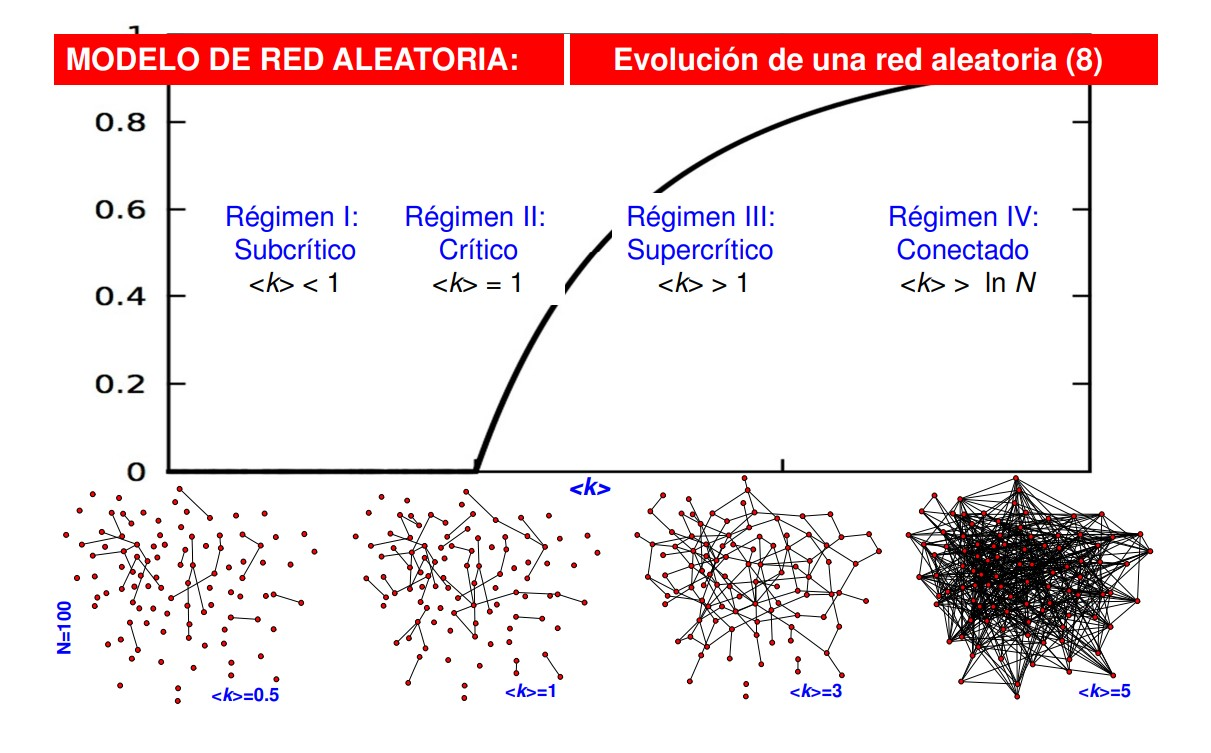

### La comparación la haremos tomando la probabilidad como parámetro de distintas regiones de la evolucion de la red aleatoria. En esta ocasión tomaremos el regimen supercrítico y conectado ya que son los casos que más se asemejan a la red de la práctica 1, osea k>1 y k>lnN. Para la primera red ln(1499) = 7,313.Para la segunda red ln(444) = 6,096. Tomaremos k=ln(N)/2 para el régimen supercrítico y k=ln(N)+1. 

## Comparación con p supercrítica

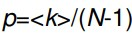

In [ ]:
#<k> = ln(N)/2 
#p = <k>/(N-1)

#MODELAMOS LA PRIMERA RED

Distribución de grado de la Red1 Nº  39


<Figure size 576x576 with 0 Axes>

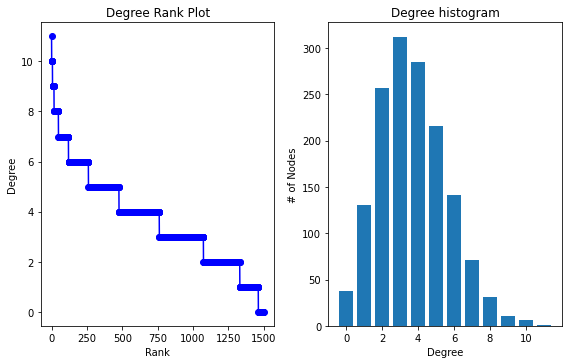

RED 1 
 ---------------------------------------------------------------- 

Número de nodos: 1500.0
Número de aristas: 6.215046099176756e+16
Camino mínimo medio: 1456.58
Grado medio: 3385354207691.0938
Radio de la red 7.84
Diámetro de la red 12.4
Media del coeficiente de clustering 0.0020489004329004323
Coeficiente de clustering global 0.002447927468147412


In [5]:
k1 = np.log(1500)/2 
p1 = k1/1499 

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)

# Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=0

#Variable con el número de nodos deseado para cada red
nodos1=1500
for x in range(50):
    red1 = nx.erdos_renyi_graph(nodos1, p1)
    
    N1 = N1 + red1.number_of_nodes()
    L1 += L1 + red1.number_of_edges()
    gradomedio1 += 2 * L1 / N1
    clustering1 += nx.average_clustering(red1)
    clusterglobal1 += nx.transitivity(red1)
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado1 = nx.connected_components(red1)
    maxconectado1 = max(conectado1, key=len) 
    caminocorto1 += len(list(nx.shortest_path(red1.subgraph(maxconectado1))))
    radio1 += nx.radius(red1.subgraph(maxconectado1))
    diametro1 += nx.diameter(red1.subgraph(maxconectado1))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red1 Nº ", x)
            degree_sequence1 = sorted((d for n, d in red1.degree()), reverse=True)
            dmax1 = max(degree_sequence1)

            fig1 = plt.figure("Grado de la red 1", figsize=(8, 8))
            fig1 = plt.figure("Grado de la red 2", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig1.add_gridspec(5, 4)

            ax1 = fig1.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence1, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig1.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence1, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig1.tight_layout()
            plt.show()
            
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',L1/50)
print('Camino mínimo medio:',caminocorto1/50 )
print('Grado medio:',gradomedio1/50)
print('Radio de la red', radio1/50)
print('Diámetro de la red', diametro1/50)
print('Media del coeficiente de clustering', clustering1/50)
print('Coeficiente de clustering global', clusterglobal1/50)




Distribución de grado de la Red2 Nº  39


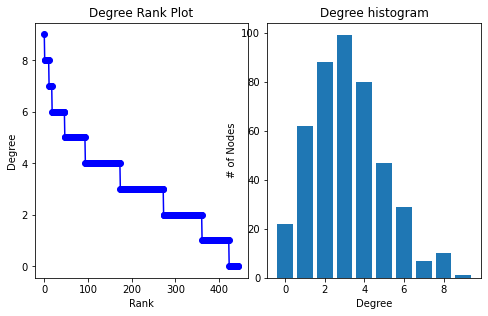

RED 2 
 ---------------------------------------------------------------- 

Número de nodos: 445.0
Número de aristas: 1.4828587141883268e+16
Camino mínimo medio: 419.94
Grado medio: 3.045573033707865
Radio de la red 7.42
Diámetro de la red 12.34
Media del coeficiente de clustering 0.0051987872302479065
Coeficiente de clustering global 0.006401686478456533


In [6]:
#MODELAMOS LA SEGUNDA RED
k2 = np.log(445)/2 
p2 = k2/444

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
# Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N2=L2=gradomedio2=caminocorto2=radio2=diametro2=clustering2=clusterglobal2=0

#Variable con el número de nodos deseado para cada red

nodos2=445
for x in range(50):
    red2 = nx.erdos_renyi_graph(nodos2, p2)
    
    N2 = N2 + red2.number_of_nodes()
    L2 += L2 + red2.number_of_edges()
    gradomedio2 += 2 * red2.number_of_edges() / red2.number_of_nodes()
    clustering2 += nx.average_clustering(red2)
    clusterglobal2 += nx.transitivity(red2)
    
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado2 = nx.connected_components(red2)
    maxconectado2 = max(conectado2, key=len) 
    caminocorto2 += len(list(nx.shortest_path(red2.subgraph(maxconectado2))))
    radio2 += nx.radius(red2.subgraph(maxconectado2))
    diametro2 += nx.diameter(red2.subgraph(maxconectado2))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red2 Nº ", x)
            degree_sequence2 = sorted((d for n, d in red2.degree()), reverse=True)
            dmax2 = max(degree_sequence2)

            fig2 = plt.figure("Grado de la red 2", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig2.add_gridspec(5, 4)

            ax1 = fig2.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence2, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig2.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence2, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig.tight_layout()
            plt.show()

print('RED 2 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N2/50)
print('Número de aristas:',L2/50)
print('Camino mínimo medio:',caminocorto2/50 )
print('Grado medio:',gradomedio2/50)
print('Radio de la red', radio2/50)
print('Diámetro de la red', diametro2/50)
print('Media del coeficiente de clustering', clustering2/50)
print('Coeficiente de clustering global', clusterglobal2/50)

## Comparación con p etapa conectado

In [7]:
#<k> = ln(N)+1
#p = <k>/(N-1)

#MODELAMOS LA PRIMERA RED

Distribución de grado de la Red1 Nº  39


<Figure size 576x576 with 0 Axes>

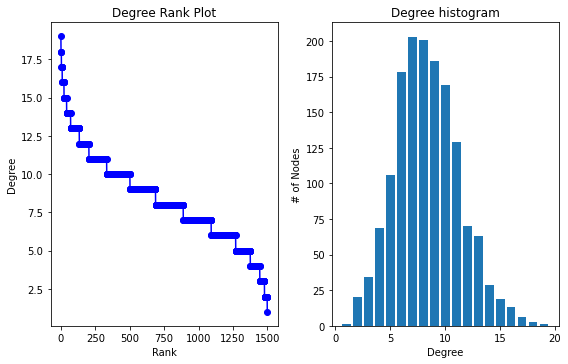

RED 1 
 ---------------------------------------------------------------- 

Número de nodos: 1500.0
Número de aristas: 1.4022400177355242e+17
Camino mínimo medio: 1499.64
Grado medio: 7638043336255.514
Radio de la red 4.98
Diámetro de la red 6.38
Media del coeficiente de clustering 0.0055170025412037745
Coeficiente de clustering global 0.005505708555654484


In [8]:
k1 = np.log(1500)+1
p1 = k1/1499 

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
# Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=0

#Variable con el número de nodos deseado para cada red
nodos1=1500
for x in range(50):
    red1 = nx.erdos_renyi_graph(nodos1, p1)
    
    N1 = N1 + red1.number_of_nodes()
    L1 += L1 + red1.number_of_edges()
    gradomedio1 += 2 *  red1.number_of_edges()/ red1.number_of_nodes()
    clustering1 += nx.average_clustering(red1)
    clusterglobal1 += nx.transitivity(red1)
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado1 = nx.connected_components(red1)
    maxconectado1 = max(conectado1, key=len) 
    caminocorto1 += len(list(nx.shortest_path(red1.subgraph(maxconectado1))))
    radio1 += nx.radius(red1.subgraph(maxconectado1))
    diametro1 += nx.diameter(red1.subgraph(maxconectado1))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red1 Nº ", x)
            degree_sequence1 = sorted((d for n, d in red1.degree()), reverse=True)
            dmax1 = max(degree_sequence1)

            fig1 = plt.figure("Grado de la red 1", figsize=(8, 8))
            fig1 = plt.figure("Grado de la red 2", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig1.add_gridspec(5, 4)

            ax1 = fig1.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence1, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig1.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence1, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig1.tight_layout()
            plt.show()
            
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',L1/50)
print('Camino mínimo medio:',caminocorto1/50 )
print('Grado medio:',gradomedio1/50)
print('Radio de la red', radio1/50)
print('Diámetro de la red', diametro1/50)
print('Media del coeficiente de clustering', clustering1/50)
print('Coeficiente de clustering global', clusterglobal1/50)



Distribución de grado de la Red2 Nº  39


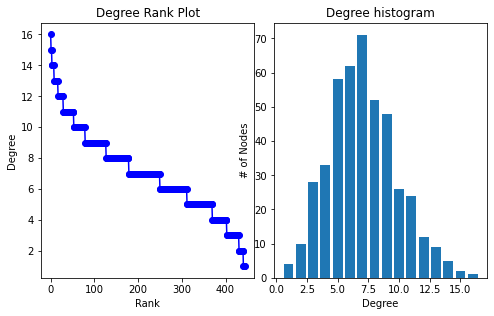

RED 2 
 ---------------------------------------------------------------- 

Número de nodos: 445.0
Número de aristas: 3.552640070370379e+16
Camino mínimo medio: 444.76
Grado medio: 7.098337078651682
Radio de la red 4.02
Diámetro de la red 6.1
Media del coeficiente de clustering 0.015622937463428627
Coeficiente de clustering global 0.015862386401210953


In [9]:
#MODELAMOS LA SEGUNDA RED
k2 = np.log(445)+1
p2 = k2/444

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)

# Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N2=L2=gradomedio2=caminocorto2=radio2=diametro2=clustering2=clusterglobal2=0

#Variable con el número de nodos deseado para cada red

nodos2=445
m=6
for x in range(50):
    red1 = nx.barabasi_albert_graph(nodos1,m)
    
    N2 = N2 + red2.number_of_nodes()
    L2 += L2 + red2.number_of_edges()
    gradomedio2 += 2 * red2.number_of_edges() / red2.number_of_nodes()
    clustering2 += nx.average_clustering(red2)
    clusterglobal2 += nx.transitivity(red2)
    
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado2 = nx.connected_components(red2)
    maxconectado2 = max(conectado2, key=len) 
    caminocorto2 += len(list(nx.shortest_path(red2.subgraph(maxconectado2))))
    radio2 += nx.radius(red2.subgraph(maxconectado2))
    diametro2 += nx.diameter(red2.subgraph(maxconectado2))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red2 Nº ", x)
            degree_sequence2 = sorted((d for n, d in red2.degree()), reverse=True)
            dmax2 = max(degree_sequence2)

            fig2 = plt.figure("Grado de la red 2", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig2.add_gridspec(5, 4)

            ax1 = fig2.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence2, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig2.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence2, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig.tight_layout()
            plt.show()

print('RED 2 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N2/50)
print('Número de aristas:',L2/50)
print('Camino mínimo medio:',caminocorto2/50 )
print('Grado medio:',gradomedio2/50)
print('Radio de la red', radio2/50)
print('Diámetro de la red', diametro2/50)
print('Media del coeficiente de clustering', clustering2/50)
print('Coeficiente de clustering global', clusterglobal2/50)

# Comparación con el Modelo Arabasi

Distribución de grado de la Red1 Nº  15


<Figure size 576x576 with 0 Axes>

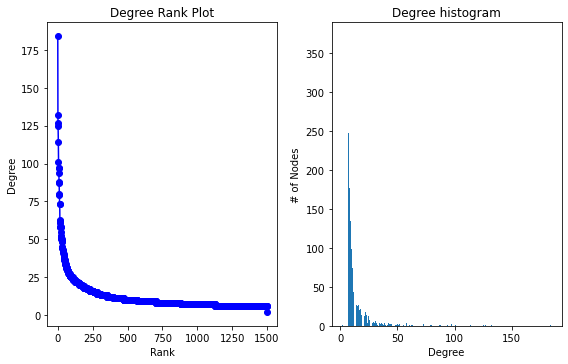

In [ ]:

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
#Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=0

#Variable con el número de nodos deseado para cada red
nodos1=1500
m=6            #grado medio
for x in range(50):
    red1 = nx.barabasi_albert_graph(nodos1,m)
    
    N1 = N1 + red1.number_of_nodes()
    L1 += L1 + red1.number_of_edges()
    gradomedio1 += 2 *  red1.number_of_edges()/ red1.number_of_nodes()
    clustering1 += nx.average_clustering(red1)
    clusterglobal1 += nx.transitivity(red1)
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado1 = nx.connected_components(red1)
    maxconectado1 = max(conectado1, key=len) 
    caminocorto1 += len(list(nx.shortest_path(red1.subgraph(maxconectado1))))
    radio1 += nx.radius(red1.subgraph(maxconectado1))
    diametro1 += nx.diameter(red1.subgraph(maxconectado1))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red1 Nº ", x)
            degree_sequence1 = sorted((d for n, d in red1.degree()), reverse=True)
            dmax1 = max(degree_sequence1)

            fig1 = plt.figure("Grado de la red 1", figsize=(8, 8))
            fig1 = plt.figure("Grado de la red 2", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig1.add_gridspec(5, 4)

            ax1 = fig1.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence1, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig1.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence1, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig1.tight_layout()
            plt.show()
            
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',L1/50)
print('Camino mínimo medio:',caminocorto1/50 )
print('Grado medio:',gradomedio1/50)
print('Radio de la red', radio1/50)
print('Diámetro de la red', diametro1/50)
print('Media del coeficiente de clustering', clustering1/50)
print('Coeficiente de clustering global', clusterglobal1/50)


Distribución de grado de la Red2 Nº  48


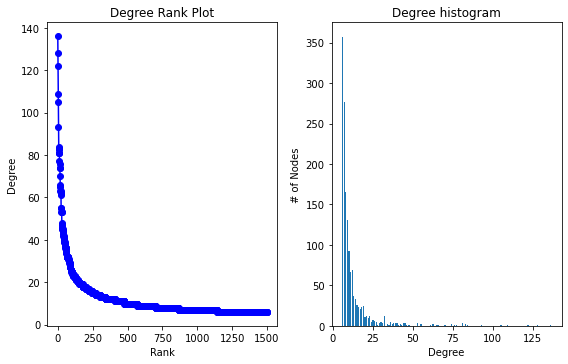

RED 2 
 ---------------------------------------------------------------- 

Número de nodos: 1500.0
Número de aristas: 2.0185133529874544e+17
Camino mínimo medio: 1500.0
Grado medio: 11.952
Radio de la red 3.0
Diámetro de la red 5.0
Media del coeficiente de clustering 0.03315298020964374
Coeficiente de clustering global 0.026071027510913364


In [7]:
#MODELAMOS LA SEGUNDA RED

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
# Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N2=L2=gradomedio2=caminocorto2=radio2=diametro2=clustering2=clusterglobal2=0

#Variable con el número de nodos deseado para cada red

nodos2=445
m=6
for x in range(50):
    red2 = nx.barabasi_albert_graph(nodos1,m)
    
    N2 = N2 + red2.number_of_nodes()
    L2 += L2 + red2.number_of_edges()
    gradomedio2 += 2 * red2.number_of_edges() / red2.number_of_nodes()
    clustering2 += nx.average_clustering(red2)
    clusterglobal2 += nx.transitivity(red2)
    
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado2 = nx.connected_components(red2)
    maxconectado2 = max(conectado2, key=len) 
    caminocorto2 += len(list(nx.shortest_path(red2.subgraph(maxconectado2))))
    radio2 += nx.radius(red2.subgraph(maxconectado2))
    diametro2 += nx.diameter(red2.subgraph(maxconectado2))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red2 Nº ", x)
            degree_sequence2 = sorted((d for n, d in red2.degree()), reverse=True)
            dmax2 = max(degree_sequence2)

            fig2 = plt.figure("Grado de la red 2", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig2.add_gridspec(5, 4)

            ax1 = fig2.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence2, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig2.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence2, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig2.tight_layout()
            plt.show()

print('RED 2 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N2/50)
print('Número de aristas:',L2/50)
print('Camino mínimo medio:',caminocorto2/50 )
print('Grado medio:',gradomedio2/50)
print('Radio de la red', radio2/50)
print('Diámetro de la red', diametro2/50)
print('Media del coeficiente de clustering', clustering2/50)
print('Coeficiente de clustering global', clusterglobal2/50)

In [ ]:
#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
#Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=0

#Variable con el número de nodos deseado para cada red
nodos1=1500
m=9
for x in range(50):
    red1 = nx.barabasi_albert_graph(nodos1,m)
    
    N1 = N1 + red1.number_of_nodes()
    L1 += L1 + red1.number_of_edges()
    gradomedio1 += 2 *  red1.number_of_edges()/ red1.number_of_nodes()
    clustering1 += nx.average_clustering(red1)
    clusterglobal1 += nx.transitivity(red1)
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado1 = nx.connected_components(red1)
    maxconectado1 = max(conectado1, key=len) 
    caminocorto1 += len(list(nx.shortest_path(red1.subgraph(maxconectado1))))
    radio1 += nx.radius(red1.subgraph(maxconectado1))
    diametro1 += nx.diameter(red1.subgraph(maxconectado1))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red1 Nº ", x)
            degree_sequence1 = sorted((d for n, d in red1.degree()), reverse=True)
            dmax1 = max(degree_sequence1)

            fig1 = plt.figure("Grado de la red 1", figsize=(8, 8))
            fig1 = plt.figure("Grado de la red 2", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig1.add_gridspec(5, 4)

            ax1 = fig1.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence1, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig1.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence1, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig1.tight_layout()
            plt.show()
            
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',L1/50)
print('Camino mínimo medio:',caminocorto1/50 )
print('Grado medio:',gradomedio1/50)
print('Radio de la red', radio1/50)
print('Diámetro de la red', diametro1/50)
print('Media del coeficiente de clustering', clustering1/50)
print('Coeficiente de clustering global', clusterglobal1/50)


In [ ]:

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
#Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=0

#Variable con el número de nodos deseado para cada red
nodos1=1500
m=6            #grado medio
for x in range(50):
    red1 = nx.barabasi_albert_graph(nodos1,m)
    
    N1 = N1 + red1.number_of_nodes()
    L1 += L1 + red1.number_of_edges()
    gradomedio1 += 2 *  red2.number_of_edges()/ red1.number_of_nodes()
    clustering1 += nx.average_clustering(red1)
    clusterglobal1 += nx.transitivity(red1)
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado1 = nx.connected_components(red1)
    maxconectado1 = max(conectado1, key=len) 
    caminocorto1 += len(list(nx.shortest_path(red1.subgraph(maxconectado1))))
    radio1 += nx.radius(red1.subgraph(maxconectado1))
    diametro1 += nx.diameter(red1.subgraph(maxconectado1))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red1 Nº ", x)
            degree_sequence1 = sorted((d for n, d in red1.degree()), reverse=True)
            dmax1 = max(degree_sequence1)

            fig1 = plt.figure("Grado de la red 1", figsize=(8, 8))
            fig1 = plt.figure("Grado de la red 2", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig1.add_gridspec(5, 4)

            ax1 = fig1.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence1, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig1.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence1, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig1.tight_layout()
            plt.show()
            
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',L1/50)
print('Camino mínimo medio:',caminocorto1/50 )
print('Grado medio:',gradomedio1/50)
print('Radio de la red', radio1/50)
print('Diámetro de la red', diametro1/50)
print('Media del coeficiente de clustering', clustering1/50)
print('Coeficiente de clustering global', clusterglobal1/50)
